In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import string

from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [11]:
filepath = "../data/clean_data.csv"
filepath_replaced = "../data/clean_data_replaced.csv"

<IPython.core.display.Javascript object>

# Functions

In [4]:
def par_to_word_tokenize(par):

    words = word_tokenize(par)
    new_words = [word for word in words if word.isalnum()]

    return new_words

<IPython.core.display.Javascript object>

In [5]:
def tokenize(text):

    tokens = map(lambda x: x.strip(string.punctuation), text.split())
    tokens = list(filter(None, tokens))

    return tokens

<IPython.core.display.Javascript object>

# Import Data

In [12]:
df = pd.read_csv(filepath)
df_replaced = pd.read_csv(filepath_replaced)

<IPython.core.display.Javascript object>

In [7]:
df.shape

(121652, 2)

<IPython.core.display.Javascript object>

In [8]:
df.head(5)

,text,label
0,"My father’s family name being Pirrip, and my C...","Dickens, Charles"
1,"I give Pirrip as my father’s family name, on t...","Dickens, Charles"
2,"Ours was the marsh country, down by the river,...","Dickens, Charles"
3,"“Hold your noise!” cried a terrible voice, as ...","Dickens, Charles"
4,"A fearful man, all in coarse grey, with a grea...","Dickens, Charles"


<IPython.core.display.Javascript object>

In [13]:
df_replaced.head(5)

,text,label
0,My father’s family name being NNP and my Chris...,"Dickens, Charles"
1,I give NNP as my father’s family name on the a...,"Dickens, Charles"
2,NNP was the marsh country down by the river wi...,"Dickens, Charles"
3,“Hold your noise!” cried a terrible voice as a...,"Dickens, Charles"
4,A fearful man all in coarse grey with a great ...,"Dickens, Charles"


<IPython.core.display.Javascript object>

# Descriptive Stats

How many total paragraphs per author?

In [10]:
df.groupby("label").count().sum()

text    121652
dtype: int64

<IPython.core.display.Javascript object>

How many words per paragraph? How many sentences per paragraph?

In [13]:
# Tokenize paragraphs
df.loc[:, "text_tokenized_word"] = list(map(lambda x: tokenize(x), df["text"]))
df.loc[:, "text_tokenized_sent"] = list(map(lambda x: sent_tokenize(x), df["text"]))

<IPython.core.display.Javascript object>

In [14]:
df.head(5)

,text,label,text_tokenized_word,text_tokenized_sent
0,"My father’s family name being Pirrip, and my C...","Dickens, Charles","[My, father’s, family, name, being, Pirrip, an...","[My father’s family name being Pirrip, and my ..."
1,"I give Pirrip as my father’s family name, on t...","Dickens, Charles","[I, give, Pirrip, as, my, father’s, family, na...","[I give Pirrip as my father’s family name, on ..."
2,"Ours was the marsh country, down by the river,...","Dickens, Charles","[Ours, was, the, marsh, country, down, by, the...","[Ours was the marsh country, down by the river..."
3,"“Hold your noise!” cried a terrible voice, as ...","Dickens, Charles","[“Hold, your, noise!”, cried, a, terrible, voi...","[“Hold your noise!” cried a terrible voice, as..."
4,"A fearful man, all in coarse grey, with a grea...","Dickens, Charles","[A, fearful, man, all, in, coarse, grey, with,...","[A fearful man, all in coarse grey, with a gre..."


<IPython.core.display.Javascript object>

In [15]:
# Get count of word and sentence tokens
df.loc[:, "text_tokenized_word_count"] = [
    len(tokenized) for tokenized in df["text_tokenized_word"]
]

df.loc[:, "text_tokenized_sent_count"] = [
    len(tokenized) for tokenized in df["text_tokenized_sent"]
]

<IPython.core.display.Javascript object>

In [16]:
df.groupby("label")["text_tokenized_word_count"].mean()

label
Austen, Jane               70.874711
Christie, Agatha           25.964870
Dickens, Charles           47.115749
Dostoyevsky, Fyodor        52.027236
Hugo, Victor               40.911942
London, Jack               55.313772
Stowe, Harriett Beecher    54.545490
Twain, Mark                60.624527
Name: text_tokenized_word_count, dtype: float64

<IPython.core.display.Javascript object>

In [17]:
df.groupby("label")["text_tokenized_sent_count"].mean()

label
Austen, Jane               3.198474
Christie, Agatha           2.438481
Dickens, Charles           2.575269
Dostoyevsky, Fyodor        3.414370
Hugo, Victor               2.567528
London, Jack               3.770160
Stowe, Harriett Beecher    2.688370
Twain, Mark                3.234659
Name: text_tokenized_sent_count, dtype: float64

<IPython.core.display.Javascript object>

# Visualizations

In [26]:
# Number of labels
labels = list(df["label"])
labels_unique = set(labels)

print("Labels:", labels_unique)
print("Number of labels:", len(labels_unique))
print("Number of paragraphs:", len(labels))

Labels: {'Dostoyevsky, Fyodor', 'Christie, Agatha', 'Stowe, Harriett Beecher', 'Hugo, Victor', 'Austen, Jane', 'Dickens, Charles', 'Twain, Mark', 'London, Jack'}
Number of labels: 8
Number of paragraphs: 121652


<IPython.core.display.Javascript object>

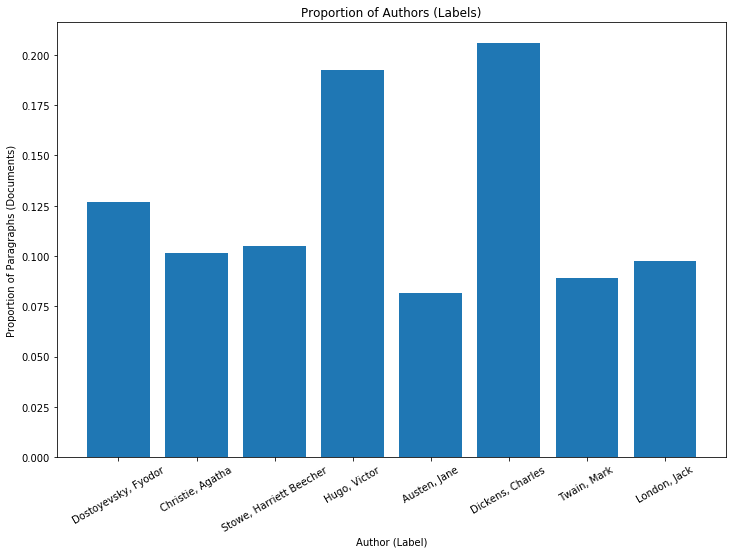

<IPython.core.display.Javascript object>

In [27]:
# Distribution of labels
labels_proportion = [labels.count(s) / len(labels) for s in labels_unique]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(list(labels_unique), labels_proportion)
ax.set_title("Proportion of Authors (Labels)")
ax.set_xlabel("Author (Label)")
ax.set_ylabel("Proportion of Paragraphs (Documents)")

plt.xticks(rotation=30)

plt.show()

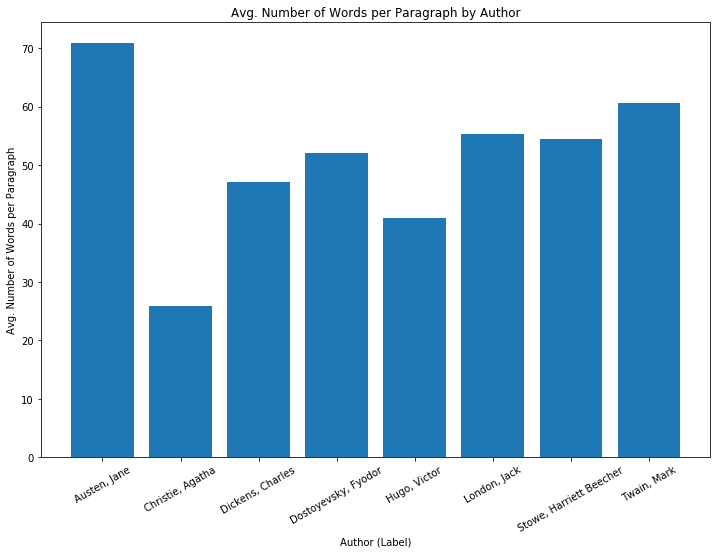

<IPython.core.display.Javascript object>

In [28]:
df_grouped = df.groupby("label")["text_tokenized_word_count"].mean()

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(df_grouped.index, df_grouped.values)
ax.set_title("Avg. Number of Words per Paragraph by Author")
ax.set_xlabel("Author (Label)")
ax.set_ylabel("Avg. Number of Words per Paragraph")

plt.xticks(rotation=30)

plt.show()

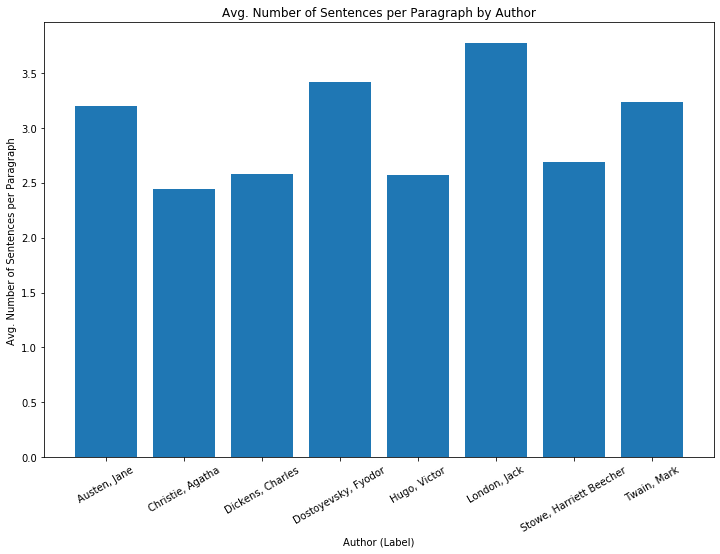

<IPython.core.display.Javascript object>

In [29]:
df_grouped = df.groupby("label")["text_tokenized_sent_count"].mean()

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(df_grouped.index, df_grouped.values)
ax.set_title("Avg. Number of Sentences per Paragraph by Author")
ax.set_xlabel("Author (Label)")
ax.set_ylabel("Avg. Number of Sentences per Paragraph")

plt.xticks(rotation=30)

plt.show()

In [58]:
df.head(5)

,text,label,text_tokenized_word,text_tokenized_sent,text_tokenized_word_count,text_tokenized_sent_count
0,"My father’s family name being Pirrip, and my C...","Dickens, Charles","[My, father, s, family, name, being, Pirrip, a...","[My father’s family name being Pirrip, and my ...",38,2
1,"I give Pirrip as my father’s family name, on t...","Dickens, Charles","[I, give, Pirrip, as, my, father, s, family, n...","[I give Pirrip as my father’s family name, on ...",197,6
2,"Ours was the marsh country, down by the river,...","Dickens, Charles","[Ours, was, the, marsh, country, down, by, the...","[Ours was the marsh country, down by the river...",169,3
3,"“Hold your noise!” cried a terrible voice, as ...","Dickens, Charles","[Hold, your, noise, cried, a, terrible, voice,...","[“Hold your noise!” cried a terrible voice, as...",34,2
4,"A fearful man, all in coarse grey, with a grea...","Dickens, Charles","[A, fearful, man, all, in, coarse, grey, with,...","[A fearful man, all in coarse grey, with a gre...",82,3


<IPython.core.display.Javascript object>

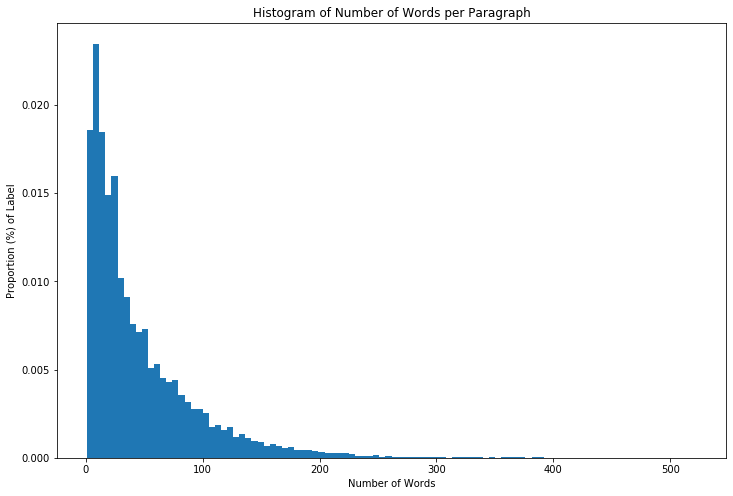

<IPython.core.display.Javascript object>

In [30]:
hist_data = df.loc[df["label"] == "Dickens, Charles", "text_tokenized_word_count"]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(hist_data, bins=100, density=True)
ax.set_title("Histogram of Number of Words per Paragraph")
ax.set_xlabel("Number of Words")
ax.set_ylabel("Proportion (%) of Label")

plt.show()